In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [87]:
def compute_mse(y,tx,w):
    e = y-tx.dot(w)
    return 1./(2.*y.shape[0])*e.dot(e)

In [78]:
def compute_rmse(y,tx,w):
    return np.sqrt(2*compute_mse(y,tx,w))

In [4]:
def least_squares(y, tx, fct='none'):
    """calculate the least squares solution."""
    wstar = np.linalg.solve(tx.T.dot(tx),(tx.T).dot(y))
    if fct=='mse':
        mse = compute_mse(y,tx,wstar)
        return mse, wstar
    elif fct=='rmse':
        rmse = compute_rmse(y,tx,wstar)
        return rmse, wstar
    else: #'none'
        return wstar

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [5]:
from helpers import *
from grid_search import generate_w, grid_search, get_best_parameters
from costs import compute_loss

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)

    grid_w0, grid_w1 = generate_w(num_intervals=300)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    gswstar = np.array([w0_star, w1_star])
    
    lswstar = least_squares(y,tx,'none')
    return lswstar-gswstar

Test it here

In [6]:
test_your_least_squares()

array([-0.28467332, -0.06543807])

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [53]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [54]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    return np.array([x**p for p in range(degree+1)]).T

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [9]:
from costs import compute_loss
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        phix = build_poly(x, degree)
        rmse, weights = least_squares(y, phix,'rmse')

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737495
Processing 3th experiment, degree=7, rmse=0.2496587036090732
Processing 4th experiment, degree=12, rmse=0.2408825776919281


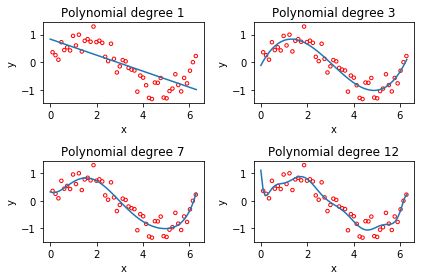

In [10]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

** TODOOOOOOOOOOOOOO **

In [23]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    if(len(y.shape)==1):
        y=y.reshape(len(y),1);
    if(len(x.shape)==1):
        x=x.reshape(len(x),1);
    y_1=np.copy(y);
    x_1=np.copy(x);
    i=0;
   
    y_new_dim=list(y.shape);
    x_new_dim=list(x.shape); 
    
    train_dim=np.int(x_new_dim[0]*ratio);
    val_dim=x_new_dim[0]-train_dim;
   
    y_new_dim[0]=train_dim;
    x_new_dim[0]=train_dim;
    y_train=np.ndarray(y_new_dim);
    x_train=np.ndarray(x_new_dim);
    
    y_new_dim[0]=val_dim;
    x_new_dim[0]=val_dim;
    y_val=np.ndarray(x_new_dim);
    x_val=np.ndarray(x_new_dim);
  
    i=0;
    while i<train_dim:
            y_train[i,:]=y_1[i,:];
            x_train[i,:]=x_1[i,:];
            i=i+1;   
    cont=0;
    while i<x.shape[0]:       
            y_val[cont,:]=y[i,:];
            x_val[cont,:]=x[i,:];
            cont=cont+1;
            i=i+1;
            
        
        
    
    return y_train,x_train,y_val,x_val






    raise NotImplementedError

Then, test your `split_data` function below.

In [15]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    raise NotImplementedError
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [16]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

# 3 Ridge Regression
Please fill in the function below.

In [46]:
def compute_ridge_mse(y,tx,w,lambda_):
    mse = compute_mse(y,tx,w)
    return mse + lambda_*np.linalg.norm(w)**2

In [70]:
def compute_ridge_rmse(y,tx,w,lambda_):
    return np.sqrt(2*compute_ridge_mse(y,tx,w,lambda_))

In [82]:
from numpy import matlib

def ridge_regression(y, tx, lambda_, fct='none'):
    """implement ridge regression."""
    wstar = np.linalg.solve(tx.T.dot(tx)+lambda_*np.matlib.identity(tx.shape[1]),(tx.T).dot(y))
    if fct=='mse':
        ridge = compute_ridge_mse(y,tx,wstar,lambda_)
        return ridge, wstar
    elif fct=='rmse':
        ridge = compute_ridge_rmse(y,tx,wstar,lambda_)
        return ridge, wstar
    else: #'none'
        return wstar

In [91]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    
    train_y, train_x, test_y, test_x = split_data(x, y, ratio, seed) ## --> do not return vectors of good dimension for now...
    train_tx = build_poly(train_x[:,0],degree)
    test_tx = build_poly(test_x[:,0],degree)
    test_y = test_y[:,0]
    train_y = train_y[:,0]
    
    rmse_tr = np.zeros(len(lambdas))
    rmse_te = np.zeros(len(lambdas))
    for ind, lambda_ in enumerate(lambdas):
        rmse_train, wstar = ridge_regression(train_y, train_tx, lambda_, 'rmse')
        rmse_tr[ind] = rmse_train
        rmse_test = compute_ridge_rmse(test_y, test_tx, wstar, lambda_)
        rmse_te[ind] = rmse_test
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.237, Testing RMSE=0.316
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.243, Testing RMSE=0.321
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.256, Testing RMSE=0.330
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.281, Testing RMSE=0.348
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.320, Testing RMSE=0.377
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.366, Testing RMSE=0.413
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.395, Testing RMSE=0.432
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.388, Testing RMSE=0.419
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.356, Testing RMSE=0.383
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.330, Testing RMSE=0.355
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.330, Testing RMSE=0.352
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.360, Testing RMSE=0.379
proportion=0.5, degree=7, lambda=0.193, 

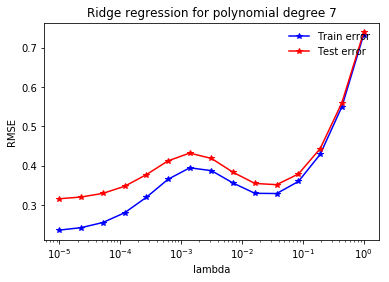

In [97]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)